# Entrenamiento de modelo <span style="color:blue">Kmeans</span>
### En esta sección se llevará a cabo el entrenamiento de los modelos de aprendizaje no supervisado

In [1]:
#importación de librerias
from sklearn import preprocessing
import pandas as pd
import numpy as np
import locale

In [2]:
#Carga de los datos previamente procesados
locale.setlocale(locale.LC_ALL,'')
#Carga de datos
datos_entrenamiento = pd.read_csv("df_censo_aprendizaje_no_supervisado_v2.csv",
                              delimiter = ',', header=0, 
                              encoding='utf-8')
#eliminar la columna del indice
datos_entrenamiento = datos_entrenamiento.drop(datos_entrenamiento.columns[0], axis=1)

In [3]:
display(datos_entrenamiento)

,MUNICIPIO_persona,PCP5_persona,PCP6_persona,PCP7_persona,PCP9_persona,LUGNACGEO_persona,PCP12_persona,PCP13_persona,PCP14_persona,PCP15_persona,...,PCP32_1D_jefe_hogar,PCP33_jefe_hogar,PCP33_B_jefe_hogar,TRABAJAGEO_jefe_hogar,PCP34_jefe_hogar,VIVEHABGEO_jefe_hogar,NIVGRADO_jefe_hogar,ANEDUCA_jefe_hogar,MIGRA_VIDA_jefe_hogar,MIGRA_REC_jefe_hogar
0,0.045557,0.933333,1.0,1.00,0.111111,0.000000,0.833333,0.0,0.0,0.255102,...,0.080808,0.111111,0.045455,0.043932,0.285714,0.045557,0.638889,0.571429,0.5,0.5
1,0.045557,0.400000,1.0,0.75,0.111111,0.043932,0.833333,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.045557,0.625000,0.523810,0.5,0.5
2,0.045557,0.400000,1.0,0.50,0.111111,0.043932,0.833333,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.045557,0.625000,0.523810,0.5,0.5
3,0.045557,0.733333,0.5,0.75,1.000000,0.043932,0.833333,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.857143,0.045557,0.430556,0.047619,0.5,1.0
4,0.045557,0.400000,0.5,0.00,0.111111,0.043932,0.833333,0.0,0.0,0.000000,...,0.090909,0.111111,0.045455,0.043932,0.285714,0.045557,0.458333,0.142857,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681885,0.993234,1.000000,1.0,0.50,0.111111,0.958243,0.833333,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1681886,0.993234,1.000000,0.5,0.50,0.111111,0.957373,0.833333,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1681887,0.993234,1.000000,0.5,0.25,0.111111,0.963027,0.833333,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1681888,0.993234,1.000000,0.5,0.25,0.111111,0.964332,0.833333,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


# <span style="color:blue">Busqueda aleatoria de hiper-parametros</span>
## Proceso más costoso, la busqueda de los mejores valores para los hiper-parametros

In [4]:
from sklearn.cluster import KMeans
from sklearn import metrics
import random
import time

In [15]:
#obtener valores de hiper-parametros a utilizar para busqueda
num_busquedas, ix = 10, 0
hiper_k =[]
while ix<num_busquedas:
    hip_t = int(random.uniform(2, 30))
    if hip_t not in hiper_k:
        hiper_k.append(hip_t)
        ix +=1
hiper_k.append(2)        

In [16]:
print(hiper_k)

[10, 27, 13, 5, 6, 8, 12, 18, 28, 22, 2]


In [17]:
#--Metodo creado para obtener las metricas de un modelo
# hiper_p_n_clusters = valor utilizado de k
# datos_entrenamiento = datos utilizados para el entrenamiento del modelo
# labels = labels resultantes del modelo
# tamanio_muestra = tamaño de la muestra a utilizar para calcular la metrica silhoutte
# imprimir_datos = indica si adicionalmente a devolver los parametros debe imprimirlos en pantalla
# start= tiempo de inicio del entrenamiento del modelo, utilizado para calcular el tiempo que tarde el modelo en entrenarse
def obtener_metricas(hiper_p_n_clusters, datos_entrenamiento, labels, tamanio_muestra, imprimir_datos, start):    
    #Generacion de métricas
    #start = time.process_time()

    #Despliegue de metricas del modelo resultante
    # 0. Hiper parametros utilizados
    if imprimir_datos:
        print('Modelo ejecutado utilizando los hiper-parametros: k= %d' % (hiper_p_n_clusters))
        print("-----------------------------")

    # 1.Número de clusters generados:
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    if imprimir_datos:
        print('Número de Clusters generados por el modelo: %d' % n_clusters_)

    # 2.Número de puntos excluidos (considerados como ruido)
    n_noise_ = list(labels).count(-1)
    if imprimir_datos:
        print('Puntos del modelo considerados como ruido: %d' % n_noise_)

    # 3.calinski_harabasz_score
    #   Criterio del radio de varianza
    #   Se define como la relación entre la dispersión dentro del grupo y la dispersión entre grupos
    #   Conforme los valores son más altos, indican mejores resultados
    #   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html#sklearn.metrics.calinski_harabasz_score
    metrica_calinski = metrics.calinski_harabasz_score(datos_entrenamiento, labels)
    if imprimir_datos:
        print("calinski harabasz score: %0.3f" % metrica_calinski)

    # 4.davies_bouldin_score
    #   El puntaje se define como la medida de similitud promedio de cada cluster con su grupo más similar, 
    #   donde la similitud es la relación entre las distancias dentro del grupo y las distancias entre grupos. 
    #   Por lo tanto, los grupos que están más separados y menos dispersos resultarán en una mejor puntuación.
    #   Valores más bajos indican mejores resultados
    #   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html#sklearn.metrics.davies_bouldin_score
    metrica_davies_bou =metrics.davies_bouldin_score(datos_entrenamiento, labels)
    if imprimir_datos:
        print("davies bouldin score: %0.3f" % metrica_davies_bou)

    # 5.silhouette_score
    #   El coeficiente se calcula utilizando la distancia media intra-cluster y la media del cluster mas cercano.
    #   El valor que indica mejores resultados es 1 y peores resultados es -1
    #   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score
    metrica_silhouette = metrics.silhouette_score(datos_entrenamiento, labels, sample_size=tamanio_muestra)
    if imprimir_datos:
        print("Silhouette Coefficient: %0.3f" % metrica_silhouette)
        print("Tiempo para generación de métricas (segundos): "+str(time.time() - start))
    
    new_row = {'k':"k="+str(hiper_p_n_clusters),'clusters':n_clusters_, 'p_ruido':n_noise_, 
               'calinski_harabasz_score':metrica_calinski,
               'davies_bouldin_score':metrica_davies_bou, 'silhouette_score': metrica_silhouette,
               'tiempo_ejec':str(time.time() - start)}
    
    return new_row

In [18]:
#ejecutar modelos en busqueda aleatoria para encontrar la mejor combinación de hiper-parametros
#proceso costoso en tiempo y procesamiento
start =  time.time()
datos_label = pd.DataFrame()
matriz_hiper_p = pd.DataFrame(columns = ['k','clusters','p_ruido', 'calinski_harabasz_score', 'davies_bouldin_score',
                                         'silhouette_score', 'tiempo_ejec'])
for item_k in hiper_k:
    partial_start = time.time()
    cluster_2 = KMeans(n_clusters=item_k, random_state=0, verbose=0, n_jobs=-1).fit(datos_entrenamiento) 
    #guardar resultados
    datos_label["k="+str(item_k)] = cluster_2.labels_.tolist()    
    
    new_row = obtener_metricas(item_k, datos_entrenamiento, cluster_2.labels_, 50000, False, partial_start)
    matriz_hiper_p = matriz_hiper_p.append(new_row, ignore_index=True)
    del cluster_2                
    
print("Tiempo utilizado para busqueda de hiper-parametros (segundos): %d"%( time.time() - start))        

Tiempo utilizado para busqueda de hiper-parametros (segundos): 2893


In [19]:
display(matriz_hiper_p)

,k,clusters,p_ruido,calinski_harabasz_score,davies_bouldin_score,silhouette_score,tiempo_ejec
0,k=10,10,0,118705.510650,2.282247,0.098514,418.3247563838959
1,k=27,27,0,65067.042940,2.475726,0.078924,404.2940402030945
2,k=13,13,0,102525.201291,2.344395,0.086015,256.6087749004364
3,k=5,5,0,182580.297420,2.291887,0.119249,134.58265733718872
4,k=6,6,0,160482.293015,2.202494,0.103292,132.1417052745819
5,k=8,8,0,136744.269238,2.315123,0.107554,211.83960843086243
6,k=12,12,0,106447.646331,2.282941,0.090543,237.93719220161438
7,k=18,18,0,85086.363823,2.288383,0.091381,293.98570919036865
8,k=28,28,0,63277.608051,2.499379,0.074574,376.7714171409607
9,k=22,22,0,74991.488710,2.405359,0.084370,338.23576855659485


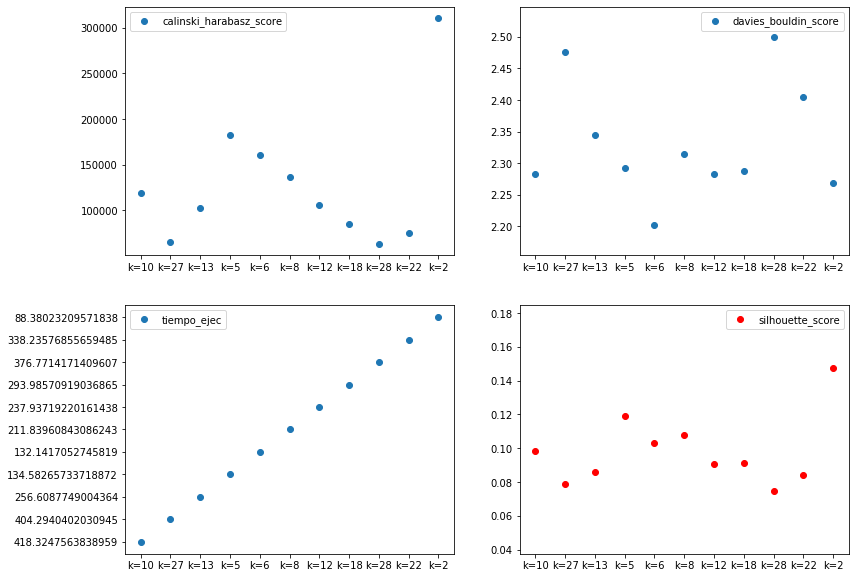

In [21]:
#Grafica del resultado de busqueda aleatoria de hiper-parametros
import matplotlib.pyplot as plt
#graficado:
figura, graficas = plt.subplots(2,2) #crear una matriz de 2 x 2 para plot
graficas[0,0].scatter(matriz_hiper_p["k"], matriz_hiper_p["calinski_harabasz_score"], label="calinski_harabasz_score")
graficas[0,1].scatter(matriz_hiper_p["k"], matriz_hiper_p["davies_bouldin_score"], label="davies_bouldin_score") 
graficas[1,1].scatter(matriz_hiper_p["k"], matriz_hiper_p["silhouette_score"], color="r", label="silhouette_score") 
graficas[1,0].scatter(matriz_hiper_p["k"], matriz_hiper_p["tiempo_ejec"], label="tiempo_ejec") 

plt.subplots_adjust(bottom=-0.1, right=1.8, top=1.8)

graficas[0,0].legend()
graficas[0,1].legend()
graficas[1,1].legend()
graficas[1,0].legend()

plt.show()

# <span style="color:blue">Guardar resultados</span>
## Se almacenan los resultados obtenidos con los modelos entrenados

In [26]:
#Agregar columnas de clase objetivo
for column in datos_label.columns:
    datos_entrenamiento[column] = datos_label[column]

In [27]:
# Crear columna calculada con información del municipio para esto se realiza el inverso de MaxAbsScaler
# por lo cual basta con multiplicarla por el valor maximo de municipio
datos_entrenamiento['MUNICIPIO_calc'] = round(datos_entrenamiento.MUNICIPIO_persona *2217)

In [28]:
#mostrar datos finales
display(datos_entrenamiento)
print()
display(matriz_hiper_p)

,MUNICIPIO_persona,PCP5_persona,PCP6_persona,PCP7_persona,PCP9_persona,LUGNACGEO_persona,PCP12_persona,PCP13_persona,PCP14_persona,PCP15_persona,...,k=13,k=5,k=6,k=8,k=12,k=18,k=28,k=22,k=2,MUNICIPIO_calc
0,0.045557,0.933333,1.0,1.00,0.111111,0.000000,0.833333,0.0,0.0,0.255102,...,10,4,4,6,3,9,25,1,0,101.0
1,0.045557,0.400000,1.0,0.75,0.111111,0.043932,0.833333,0.0,0.0,0.000000,...,10,4,4,6,3,9,4,1,0,101.0
2,0.045557,0.400000,1.0,0.50,0.111111,0.043932,0.833333,0.0,0.0,0.000000,...,10,4,4,6,3,9,4,1,0,101.0
3,0.045557,0.733333,0.5,0.75,1.000000,0.043932,0.833333,0.0,0.0,0.000000,...,10,4,4,6,3,9,4,1,0,101.0
4,0.045557,0.400000,0.5,0.00,0.111111,0.043932,0.833333,0.0,0.0,0.000000,...,10,4,4,6,3,9,25,1,0,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681885,0.993234,1.000000,1.0,0.50,0.111111,0.958243,0.833333,0.0,0.0,0.000000,...,10,4,4,6,3,9,25,1,0,2202.0
1681886,0.993234,1.000000,0.5,0.50,0.111111,0.957373,0.833333,0.0,0.0,0.000000,...,10,4,4,6,3,9,25,1,0,2202.0
1681887,0.993234,1.000000,0.5,0.25,0.111111,0.963027,0.833333,0.0,0.0,0.000000,...,10,4,4,6,3,9,25,1,0,2202.0
1681888,0.993234,1.000000,0.5,0.25,0.111111,0.964332,0.833333,0.0,0.0,0.000000,...,10,4,4,6,3,9,25,1,0,2202.0


,k,clusters,p_ruido,calinski_harabasz_score,davies_bouldin_score,silhouette_score,tiempo_ejec
0,k=10,10,0,118705.510650,2.282247,0.098514,418.3247563838959
1,k=27,27,0,65067.042940,2.475726,0.078924,404.2940402030945
2,k=13,13,0,102525.201291,2.344395,0.086015,256.6087749004364
3,k=5,5,0,182580.297420,2.291887,0.119249,134.58265733718872
4,k=6,6,0,160482.293015,2.202494,0.103292,132.1417052745819
5,k=8,8,0,136744.269238,2.315123,0.107554,211.83960843086243
6,k=12,12,0,106447.646331,2.282941,0.090543,237.93719220161438
7,k=18,18,0,85086.363823,2.288383,0.091381,293.98570919036865
8,k=28,28,0,63277.608051,2.499379,0.074574,376.7714171409607
9,k=22,22,0,74991.488710,2.405359,0.084370,338.23576855659485


In [29]:
#Guardar en disco los resultados
datos_entrenamiento.to_csv('df_kmeans_datos_y.csv', encoding='utf-8')
matriz_hiper_p.to_csv('df_kmeans_metricas.csv', encoding='utf-8')